In [7]:



# Load necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns



In [8]:
# Replace the file path with your actual path
file_path = "D:/Stevens/KDD/breast-cancer-wisconsin.csv"

# Reading the CSV file
data = pd.read_csv(file_path, header=None)
data.columns = ["Sample", "F1", "F2", "F3", "F4", "F5", "F6", "F7", "F8", "F9", "Class"]
data = data.iloc[1:]



In [9]:
# Preprocess the data, replacing '?' with NaN and dropping rows with missing values
data = data.replace('?', pd.NA)
data = data.dropna()

# Encode the 'Class' column using label encoding
label_encoder = LabelEncoder()
data["Class"] = label_encoder.fit_transform(data["Class"])



In [10]:
# Split the data into training and test sets
X = data[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9']]
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Train a Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)



GaussianNB()

Predictions:  [0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 1
 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1
 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1]


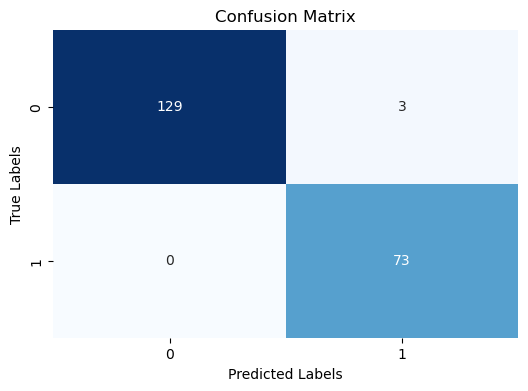

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       132
           1       0.96      1.00      0.98        73

    accuracy                           0.99       205
   macro avg       0.98      0.99      0.98       205
weighted avg       0.99      0.99      0.99       205



In [11]:
# Make predictions
predictions = model.predict(X_test)
print("Predictions: ", predictions)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Calculate the accuracy
accuracy = accuracy_score(y_test, predictions)


# Print the classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

In [12]:
# Print the confusion matrix, accuracy, and error rate
print(conf_matrix)
print("Accuracy:", accuracy)
print("Error rate:", 1 - accuracy)

[[129   3]
 [  0  73]]
Accuracy: 0.9853658536585366
Error rate: 0.014634146341463428
